<a href="https://colab.research.google.com/github/Mustufa-kerawala/Time-series-Telstra.ltd-18-9/blob/master/Week2(3_Regress).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing dependencies to create algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#Mounting to drive maybe an important step fuck knows
from google.colab import drive


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


#Modelling Metrics
from sklearn import metrics


  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=3527c453f0bf724dc5173fc1a9def4c8306614932215904a330dc7c5b7921240
  Stored in directory: /tmp/pip-ephem-wheel-cache-rdgbyymg/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [2]:
#Another mounting step irrelevant tbh
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive


In [3]:
#Retrieving the dataset from yahoo finance and turning it into a csv
df_full = pdr.get_data_yahoo("TLS.AX", start="2018-01-01").reset_index()

df_full.to_csv('TLS.AX.csv',index=False)


[*********************100%***********************]  1 of 1 downloaded


In [4]:
#Tells us the number of observations and columns aka shape 
df_full.shape

(428, 7)

In [5]:
df_full.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,3.64,3.675,3.630,3.66,3.395713,8990912
1,2018-01-03,3.67,3.685,3.645,3.66,3.395713,12418563
2,2018-01-04,3.68,3.690,3.670,3.68,3.414269,12158560
3,2018-01-05,3.70,3.730,3.690,3.73,3.460658,18064317
4,2018-01-08,3.74,3.760,3.730,3.75,3.479214,18490173


In [6]:
#This command gives us summary stats of all the data in each column
df_full.describe()


,Open,High,Low,Close,Adj Close,Volume
count,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02
mean,3.250841,3.280210,3.222956,3.254381,3.144479,2.922945e+07
std,0.344743,0.345147,0.343742,0.345147,0.361026,1.443035e+07
min,2.620000,2.640000,2.600000,2.620000,2.484196,8.252280e+06
25%,2.997500,3.030000,2.967500,3.020000,2.918566,1.994071e+07
50%,3.200000,3.235000,3.180000,3.205000,3.097710,2.610984e+07
75%,3.530000,3.562500,3.492500,3.522500,3.341203,3.412221e+07
max,3.980000,4.010000,3.950000,3.990000,3.936658,1.240131e+08


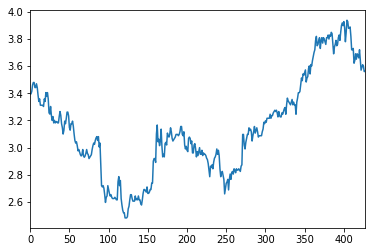

In [7]:
df_full["Adj Close"].plot()


In [0]:
#Setting the date as an index to pre-process the data 
df_full.set_index("Date", inplace=True)


In [9]:
#Brief screenshot of the data 
df_full.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,3.64,3.675,3.630,3.66,3.395713,8990912
2018-01-03,3.67,3.685,3.645,3.66,3.395713,12418563
2018-01-04,3.68,3.690,3.670,3.68,3.414269,12158560
2018-01-05,3.70,3.730,3.690,3.73,3.460658,18064317
2018-01-08,3.74,3.760,3.730,3.75,3.479214,18490173


In [0]:
window_size = 32
num_samples = len(df_full)-window_size

#Making the data into an array
indices = np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

data = df_full['Adj Close'].values[indices]#making a 2D matrix

x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
#Splitting the data for cross validation ie to train alg
split_fraction=0.8
ind_split=int(split_fraction*num_samples)


In [0]:
#Training the algorithm
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [13]:
#shows the shape of the data 
y_test.shape

(80,)

# Baseline to compare 

In [0]:
#Creating a model by defining functions
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
def get_plot (model_pred):
  
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [0]:
y_pred_lag=np.roll(y_test,1)


In [16]:
get_performance(y_pred_lag)


Mean Absolute Error: 0.0368
Mean Squared Error: 0.0021
Root Mean Squared Error: 0.0453


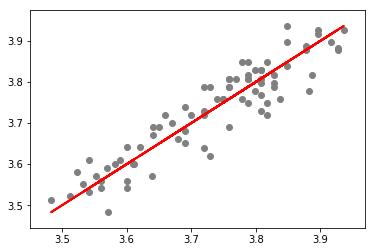

In [17]:
get_plot(y_pred_lag)


# Linear Regression


In [18]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
             

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)


In [20]:
get_performance(y_pred_lr)


Mean Absolute Error: 0.0419
Mean Squared Error: 0.0025
Root Mean Squared Error: 0.0504


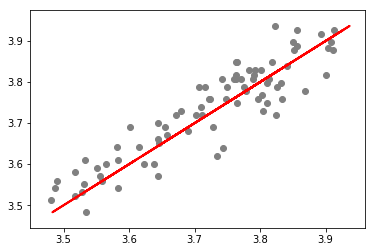

In [21]:
get_plot(y_pred_lr)


In [22]:
#Predicted Slope coefficients of Telstra
model_lr.coef_


array([-0.02778221, -0.01473755, -0.00419343, -0.02060685,  0.03296298,
       -0.09817187,  0.06888865,  0.0824589 ,  0.01734837,  0.01914763,
       -0.08520218,  0.06504177, -0.03679151, -0.01621324, -0.17111087,
        0.21115417, -0.09240473,  0.00473006, -0.01808922,  0.18761812,
       -0.01181111, -0.12225859,  0.11038443, -0.08858371,  0.09913304,
       -0.19514234, -0.01074906,  0.12461479, -0.0256337 ,  0.09999469,
       -0.11986464,  1.01631959])

In [23]:
#Intercept
model_lr.intercept_


0.059192465408580475

# Ridge Regression


In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [25]:
get_performance(y_pred_ridge)


Mean Absolute Error: 0.0433
Mean Squared Error: 0.0028
Root Mean Squared Error: 0.0525


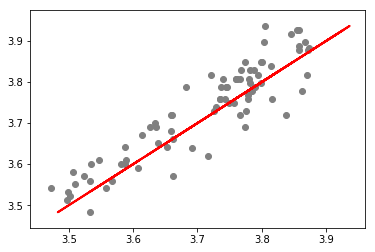

In [26]:
get_plot(y_pred_ridge)


Lasso Regression

In [27]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred_lasso = model_lasso.predict(x_test)


In [29]:
get_performance(y_pred_lasso)



Mean Absolute Error: 0.7568
Mean Squared Error: 0.586
Root Mean Squared Error: 0.7655


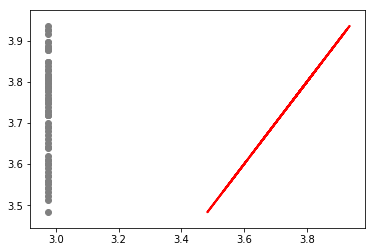

In [30]:
get_plot(y_pred_lasso)